In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import scipy
import os

In [2]:
# project files

from utils.variables import pack, unpack
from utils.display import table, tabulate
from utils.files import download_sheet, save, load
from utils.hash import digest

from fit_options import fit_options
from utils.soft_round import soft_round, soft_floor, soft_floor_top

In [3]:
# stuff for display

from IPython.lib.pretty import pretty, pprint

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 120)

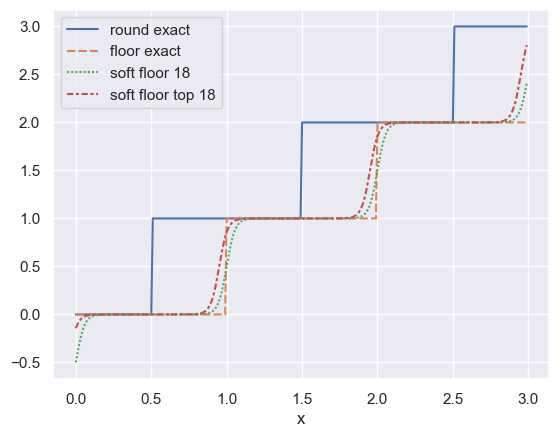

In [4]:
x = np.arange(0,3,0.01)

data=pd.DataFrame({'x':x,
                   f'round exact': np.round(x),
                   f'floor exact': np.floor(x),
                   f'soft floor 18': soft_floor(x,18),
                   f'soft floor top 18': soft_floor_top(x, 18),
            }).set_index('x')
_ = sns.lineplot(data)

In [7]:
alphas = [12, 18, 24]

for alpha in alphas:

    fit_options.soft_round.exact = False
    fit_options.soft_round.alpha = alpha

    print( f"alpha={alpha}")
    table([
    (100*1.22, np.floor(100*1.22), soft_floor_top(100*1.22) ),
    (100*1.22*1.08, np.floor(100*1.22*1.08), soft_floor_top(100*1.22*1.08) ),
    (100*1.22*0.92, np.floor(100*1.22*0.92), soft_floor_top(100*1.22*0.92) ),

    (100*1.07, np.floor(100*1.07) , soft_floor_top(100*1.07)),
    (100*1.131, np.floor(100*1.131) , soft_floor_top(100*1.131)),
    (100*1.18, np.floor(100*1.18) , soft_floor_top(100*1.18)),

    (100*1.07*1.08, np.floor(100*1.07*1.08) , soft_floor_top(100*1.07*1.08)),
    (100*1.13*1.08, np.floor(100*1.13*1.08) , soft_floor_top(100*1.13*1.08)),
    (100*1.18*1.08, np.floor(100*1.18*1.08) , soft_floor_top(100*1.18*1.08)),

    (100*1.07*0.92, np.floor(100*1.07*0.92) , soft_floor_top(100*1.07*0.92)),
    (100*1.13*0.92,  np.floor(100*1.13*0.92) , soft_floor_top(100*1.13*0.92)),
    (100*1.18*0.92, np.floor(100*1.18*0.92) , soft_floor_top(100*1.18*0.92)),
    ], floatfmt=".3f")

alpha=12


122.000,122.000,121.827
131.760,131.000,131.015
112.240,112.000,111.999
107.000,107.000,106.827
113.100,113.000,112.981
118.000,118.000,117.827
115.560,115.000,115.000
122.040,122.000,121.926
127.440,127.000,127.000
98.440,98.000,98.000
103.960,103.000,103.646


alpha=18


122.000,122.000,121.856
131.760,131.000,131.001
112.240,112.000,112.000
107.000,107.000,106.856
113.100,113.000,112.995
118.000,118.000,117.856
115.560,115.000,115.000
122.040,122.000,121.962
127.440,127.000,127.000
98.440,98.000,98.000
103.960,103.000,103.584


alpha=24


122.000,122.000,121.880
131.760,131.000,131.000
112.240,112.000,112.000
107.000,107.000,106.880
113.100,113.000,112.999
118.000,118.000,117.880
115.560,115.000,115.000
122.040,122.000,121.980
127.440,127.000,127.000
98.440,98.000,98.000
103.960,103.000,103.517


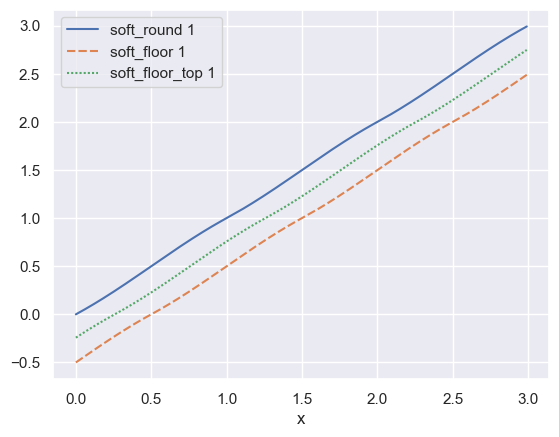

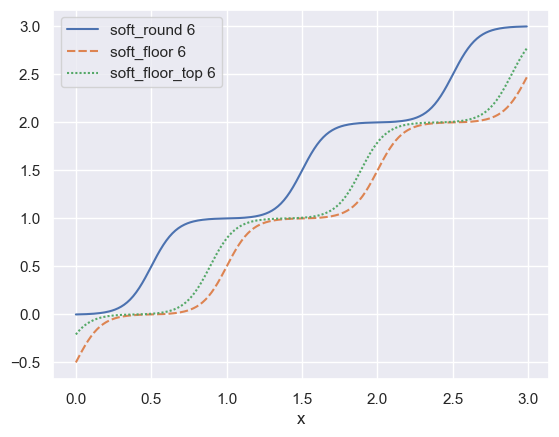

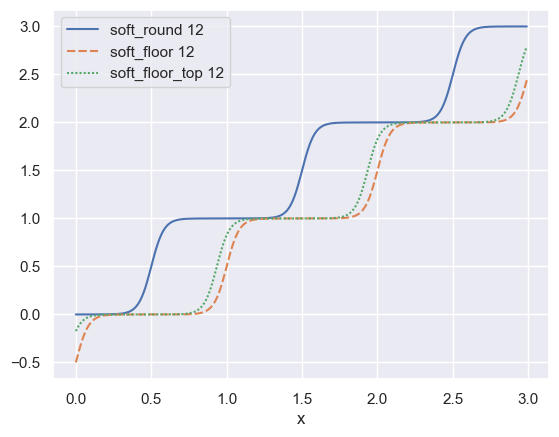

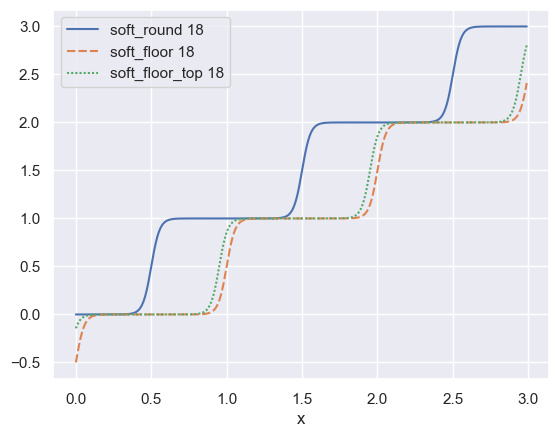

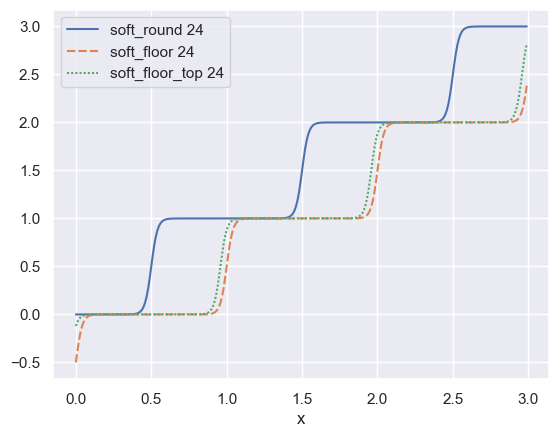

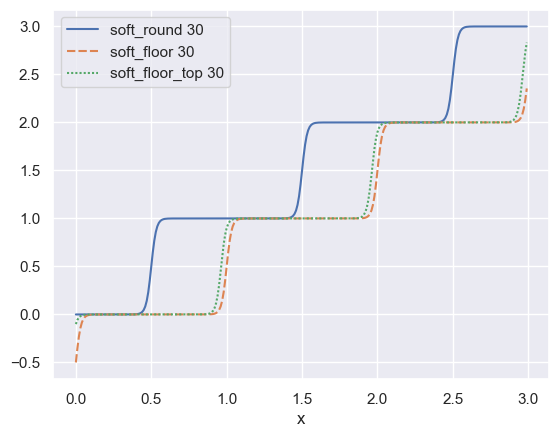

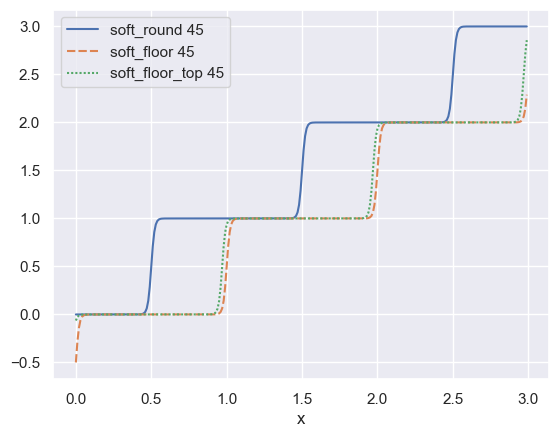

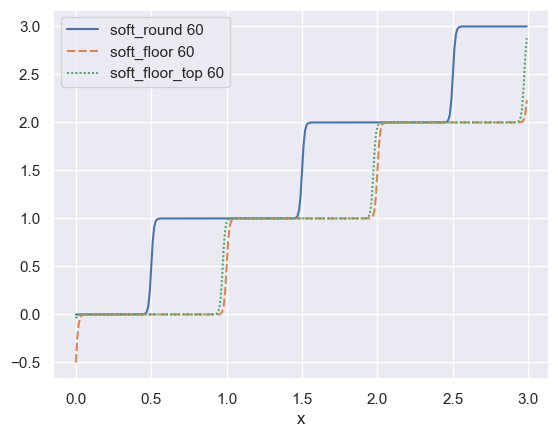

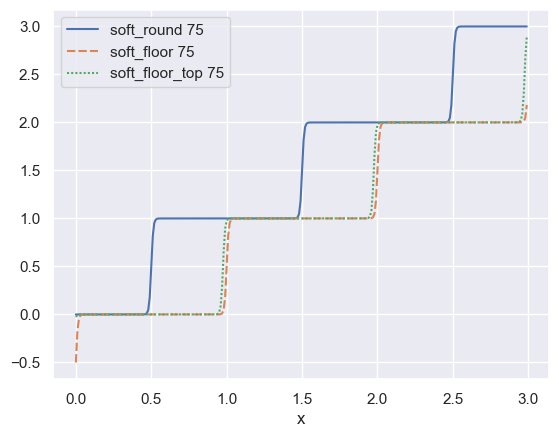

In [6]:
x = np.arange(0,3,0.01)

alphas = [1, 6, 12, 18, 24, 30, 45, 60, 75]

for alpha in alphas:
    fit_options.soft_round.exact = False
    fit_options.soft_round.alpha = alpha
    data=pd.DataFrame({'x':x,
                       f'soft_round {alpha}': soft_round(x),
                       f'soft_floor {alpha}': soft_floor(x),
                       f'soft_floor_top {alpha}': soft_floor_top(x)
                    }).set_index('x')

    f = plt.figure()
    g = sns.lineplot(data)
    plt.close()
    display(f)